## Подготовка к занятию 9.2: Diffusion Models

## Hugging Face
1. Зарегистрируйтесь и залогиньтесь на huggingface.co (https://huggingface.co/join)
2. Зайдите на model card для Stable Diffusion, прочитайте лицензию и нажмите "Agree" (https://huggingface.co/runwayml/stable-diffusion-v1-5)
3. Создайте токен доступа на huggingface.co, положите его в файл рядом huggingface_token.txt (https://huggingface.co/settings/tokens)

## Занятие 9.2 Diffusion Models with `diffusers` package
https://github.com/huggingface/diffusers

### Text-to-Image Stable Diffusion

In [2]:
from diffusers import StableDiffusionPipeline
import torch
import numpy as np
import PIL

C:\Users\bzimka\.conda\envs\openmmlab\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]


In [3]:
with open('huggingface_token.txt', 'r') as f:
    access_token = f.read()

In [8]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, revision="fp16", 
                                               use_auth_token=access_token)
pipe = pipe.to("cuda")

text_encoder\model.safetensors not found
Loading pipeline components...:  86%|███████████████████████████████████████████████████████████████████████████▍            | 6/7 [00:08<00:01,  1.15s/it]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading pipeline components...: 100%|████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:12<00:00,  1.76s/it]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 20.12it/s]


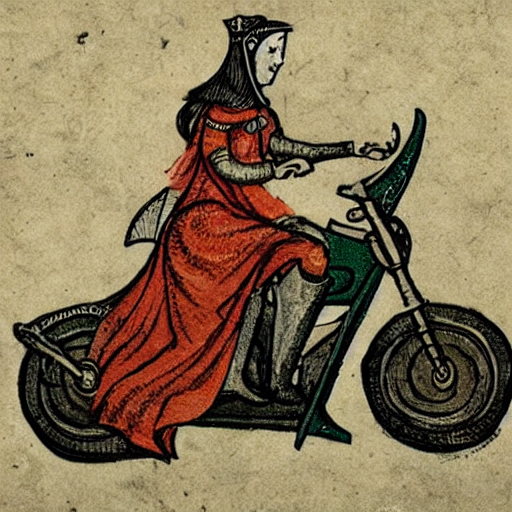

In [28]:
prompt = "a breakfast on moon"
prompt = "a cartoon where white bear watches a TV in african desert"
prompt = "a red panda holds a coffee mug"
prompt = "a pair of dumplings flying in deep space"


prompt = "a medieval queen riding a motorbike"

image = pipe(prompt).images[0]
image

### Ипользование публичных предобученных моделей

In [30]:
pipe = StableDiffusionPipeline.from_pretrained("DGSpitzer/Cyberpunk-Anime-Diffusion", torch_dtype=torch.float16, revision="fp16", 
                                               use_auth_token=access_token)
pipe = pipe.to("cuda")

text_encoder\model.safetensors not found
Loading pipeline components...:  57%|██████████████████████████████████████████████████▎                                     | 4/7 [00:14<00:08,  2.76s/it]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading pipeline components...: 100%|████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:24<00:00,  3.55s/it]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 18.51it/s]


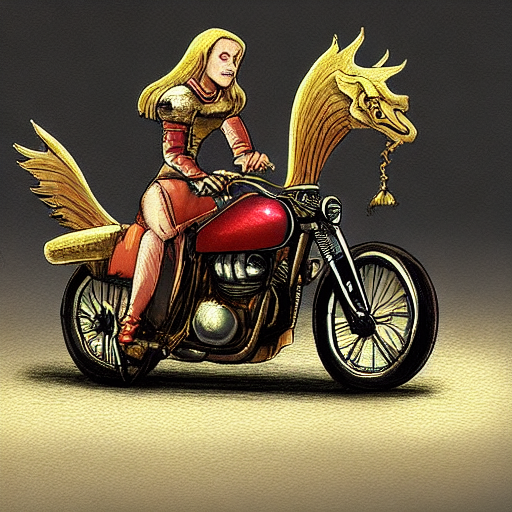

In [43]:
prompt = "a medieval queen riding a motorbike"

image = pipe(prompt).images[0]
image

https://arxiv.org/pdf/2006.11239.pdf

Общая схема пайплайна: https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/text2img

## Unconditional Image Generation
https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline

In [44]:
from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained("CompVis/ldm-celebahq-256")
pipe.to("cuda")

unet\diffusion_pytorch_model.safetensors not found
Loading pipeline components...: 100%|████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.48s/it]


LDMPipeline {
  "_class_name": "LDMPipeline",
  "_diffusers_version": "0.21.4",
  "_name_or_path": "CompVis/ldm-celebahq-256",
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ],
  "vqvae": [
    "diffusers",
    "VQModel"
  ]
}

Про VQ-VAE: https://mlberkeley.substack.com/p/vq-vae

In [45]:
seed = 10
generator = torch.manual_seed(seed)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 27.23it/s]


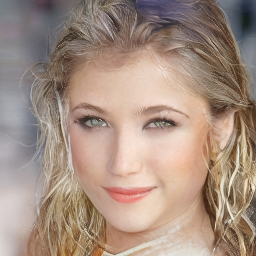

In [46]:
images = pipe(generator=generator).images
images[0]

Список пайплайнов: https://github.com/huggingface/diffusers/tree/main/src/diffusers/pipelines 


In [47]:
del pipe
torch.cuda.empty_cache()

### Запуск пайплайна по частям

In [48]:
from diffusers import UNet2DModel, DDIMScheduler, VQModel
import tqdm


# load all models
unet = UNet2DModel.from_pretrained("CompVis/ldm-celebahq-256", subfolder="unet")
vqvae = VQModel.from_pretrained("CompVis/ldm-celebahq-256", subfolder="vqvae")
scheduler = DDIMScheduler.from_config("CompVis/ldm-celebahq-256", subfolder="scheduler")

# set to cuda
torch_device = "cuda" if torch.cuda.is_available() else "cpu"

unet.to(torch_device)
vqvae.to(torch_device);

C:\Users\bzimka\.conda\envs\openmmlab\lib\site-packages\diffusers\configuration_utils.py:239: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddim.DDIMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)
The config attributes {'timestep_values': None, 'timesteps': 1000} were passed to DDIMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


In [49]:
seed = 10
generator = torch.manual_seed(seed)

In [50]:
# generate gaussian noise to be decoded

noise = torch.randn(
    (1, unet.in_channels, unet.sample_size, unet.sample_size),
    generator=generator,
).to(torch_device)

# set inference steps for DDIM
scheduler.set_timesteps(num_inference_steps=200)

image = noise
for t in tqdm.tqdm(scheduler.timesteps):
    # predict noise residual of previous image
    with torch.no_grad():
        residual = unet(image, t)["sample"]

    # compute previous image x_t according to DDIM formula
    prev_image = scheduler.step(residual, t, image, eta=0.0)["prev_sample"]

    # x_t-1 -> x_t
    image = prev_image

# decode image with vae
with torch.no_grad():
    image = vqvae.decode(image)


C:\Users\bzimka\AppData\Local\Temp\ipykernel_19908\171966907.py:4: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DModel's config object instead, e.g. 'unet.config.in_channels'.
  (1, unet.in_channels, unet.sample_size, unet.sample_size),
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:05<00:00, 33.78it/s]


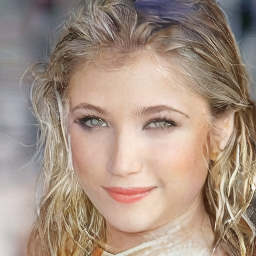

In [51]:
# process image
image_processed = image.sample.cpu().permute(0, 2, 3, 1)
image_processed = (image_processed + 1.0) * 127.5
image_processed = image_processed.clamp(0, 255).numpy().astype(np.uint8)
image_pil = PIL.Image.fromarray(image_processed[0])
image_pil

### Тренировка DM
https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/training_example.ipynb

In [52]:
from dataclasses import dataclass

@dataclass
class TrainingConfig:
    image_size = 64  # the generated image resolution
    train_batch_size = 16
    eval_batch_size = 16  # how many images to sample during evaluation
    num_epochs = 50
    gradient_accumulation_steps = 1
    learning_rate = 1e-4
    lr_warmup_steps = 500
    save_image_epochs = 10
    save_model_epochs = 30
    mixed_precision = 'fp16'  # `no` for float32, `fp16` for automatic mixed precision
    output_dir = 'ddpm-butterflies-128'  # the model name locally and on the HF Hub

    push_to_hub = False  # whether to upload the saved model to the HF Hub
    hub_private_repo = False  
    overwrite_output_dir = True  # overwrite the old model when re-running the notebook
    seed = 0

config = TrainingConfig()

In [53]:
from datasets import load_dataset

config.dataset_name = "huggan/smithsonian_butterflies_subset"
dataset = load_dataset(config.dataset_name, split="train")

Repo card metadata block was not found. Setting CardData to empty.
Generating train split: 100%|██████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 560.89 examples/s]


In [54]:
dataset

Dataset({
    features: ['image_url', 'image_alt', 'id', 'name', 'scientific_name', 'gender', 'taxonomy', 'region', 'locality', 'date', 'usnm_no', 'guid', 'edan_url', 'source', 'stage', 'image', 'image_hash', 'sim_score'],
    num_rows: 1000
})

C:\Users\bzimka\AppData\Local\Temp\ipykernel_19908\3278871621.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


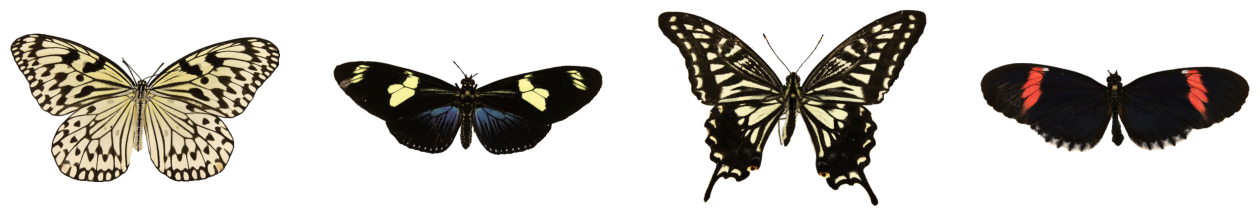

In [55]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i, image in enumerate(dataset[:4]["image"]):
    axs[i].imshow(image)
    axs[i].set_axis_off()
fig.show()

In [56]:
from torchvision import transforms

preprocess = transforms.Compose(
    [
        transforms.Resize((config.image_size, config.image_size)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)

In [57]:
def transform(examples):
    images = [preprocess(image.convert("RGB")) for image in examples["image"]]
    return {"images": images}

dataset.set_transform(transform)

C:\Users\bzimka\AppData\Local\Temp\ipykernel_19908\948138263.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


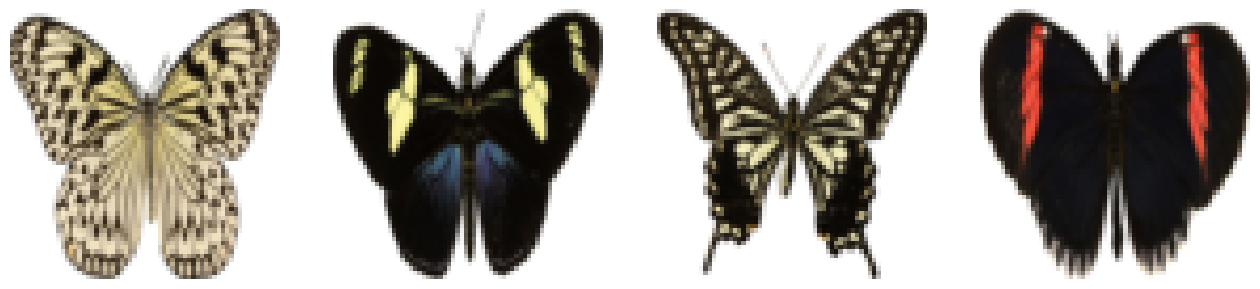

In [58]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i, image in enumerate(dataset[:4]["images"]):
    axs[i].imshow(image.permute(1, 2, 0).numpy() / 2 + 0.5)
    axs[i].set_axis_off()
fig.show()

In [59]:
import torch

train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=config.train_batch_size, shuffle=True)

In [60]:
from diffusers import UNet2DModel


model = UNet2DModel(
    sample_size=config.image_size,  # the target image resolution
    in_channels=3,  # the number of input channels, 3 for RGB images
    out_channels=3,  # the number of output channels
    layers_per_block=2,  # how many ResNet layers to use per UNet block
    block_out_channels=(64, 64, 128, 128, 256, 256),  # the number of output channes for each UNet block
    down_block_types=( 
        "DownBlock2D",  # a regular ResNet downsampling block
        "DownBlock2D", 
        "DownBlock2D", 
        "DownBlock2D", 
        "AttnDownBlock2D",  # a ResNet downsampling block with spatial self-attention
        "DownBlock2D",
    ), 
    up_block_types=(
        "UpBlock2D",  # a regular ResNet upsampling block
        "AttnUpBlock2D",  # a ResNet upsampling block with spatial self-attention
        "UpBlock2D", 
        "UpBlock2D", 
        "UpBlock2D", 
        "UpBlock2D"  
      ),
)

In [61]:
sample_image = dataset[0]['images'].unsqueeze(0)
print('Input shape:', sample_image.shape)

Input shape: torch.Size([1, 3, 64, 64])


In [62]:
print('Output shape:', model(sample_image, timestep=0).sample.shape)

Output shape: torch.Size([1, 3, 64, 64])


In [63]:
from diffusers import DDPMScheduler

noise_scheduler = DDPMScheduler(num_train_timesteps=1000)

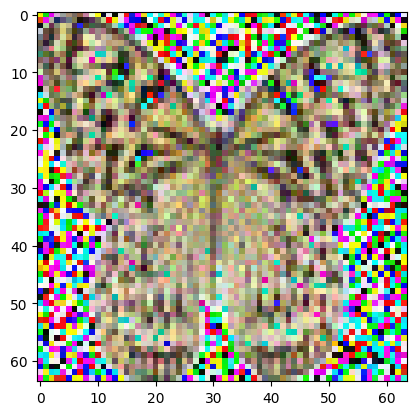

In [64]:
import torch
from PIL import Image

noise = torch.randn(sample_image.shape)
timesteps = torch.LongTensor([50])
noisy_image = noise_scheduler.add_noise(sample_image, noise, timesteps)

plt.imshow(
    Image.fromarray(((noisy_image.permute(0, 2, 3, 1) + 1.0) * 127.5).type(torch.uint8).numpy()[0])
)

In [65]:
import torch.nn.functional as F

noise_pred = model(noisy_image, timesteps).sample
loss = F.mse_loss(noise_pred, noise)

In [66]:
optimizer = torch.optim.AdamW(model.parameters(), lr=config.learning_rate)

In [67]:
from diffusers.optimization import get_cosine_schedule_with_warmup

lr_scheduler = get_cosine_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=config.lr_warmup_steps,
    num_training_steps=(len(train_dataloader) * config.num_epochs),
)

In [68]:
from diffusers import DDPMPipeline

import math

def make_grid(images, rows, cols):
    w, h = images[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    for i, image in enumerate(images):
        grid.paste(image, box=(i%cols*w, i//cols*h))
    return grid

def evaluate(config, epoch, pipeline):
    # Sample some images from random noise (this is the backward diffusion process).
    # The default pipeline output type is `List[PIL.Image]`
    images = pipeline(
        batch_size = config.eval_batch_size, 
        generator=torch.manual_seed(config.seed),
    ).images

    # Make a grid out of the images
    image_grid = make_grid(images, rows=4, cols=4)

    # Save the images
    test_dir = os.path.join(config.output_dir, "samples")
    os.makedirs(test_dir, exist_ok=True)
    image_grid.save(f"{test_dir}/{epoch:04d}.png")

In [73]:
from accelerate import Accelerator
from huggingface_hub import HfFolder, Repository, whoami

from tqdm.auto import tqdm
from pathlib import Path
import os

def get_full_repo_name(model_id: str, organization: str = None, token: str = None):
    if token is None:
        token = HfFolder.get_token()
    if organization is None:
        username = whoami(token)["name"]
        return f"{username}/{model_id}"
    else:
        return f"{organization}/{model_id}"

def train_loop(config, model, noise_scheduler, optimizer, train_dataloader, lr_scheduler):
    # Initialize accelerator and tensorboard logging
    accelerator = Accelerator(
        mixed_precision=config.mixed_precision,
        gradient_accumulation_steps=config.gradient_accumulation_steps, 
        #log_with="tensorboard",
        #logging_dir=os.path.join(config.output_dir, "logs")
    )
    if accelerator.is_main_process:
        if config.push_to_hub:
            repo_name = get_full_repo_name(Path(config.output_dir).name)
            repo = Repository(config.output_dir, clone_from=repo_name)
        elif config.output_dir is not None:
            os.makedirs(config.output_dir, exist_ok=True)
        accelerator.init_trackers("train_example")
    
    # Prepare everything
    # There is no specific order to remember, you just need to unpack the 
    # objects in the same order you gave them to the prepare method.
    model, optimizer, train_dataloader, lr_scheduler = accelerator.prepare(
        model, optimizer, train_dataloader, lr_scheduler
    )
    
    global_step = 0

    # Now you train the model
    for epoch in range(config.num_epochs):
        progress_bar = tqdm(total=len(train_dataloader), disable=not accelerator.is_local_main_process)
        progress_bar.set_description(f"Epoch {epoch}")

        for step, batch in enumerate(train_dataloader):
            clean_images = batch['images']
            # Sample noise to add to the images
            noise = torch.randn(clean_images.shape).to(clean_images.device)
            bs = clean_images.shape[0]

            # Sample a random timestep for each image
            timesteps = torch.randint(0, noise_scheduler.num_train_timesteps, (bs,), device=clean_images.device).long()

            # Add noise to the clean images according to the noise magnitude at each timestep
            # (this is the forward diffusion process)
            noisy_images = noise_scheduler.add_noise(clean_images, noise, timesteps)
            
            with accelerator.accumulate(model):
                # Predict the noise residual
                noise_pred = model(noisy_images, timesteps, return_dict=False)[0]
                loss = F.mse_loss(noise_pred, noise)
                accelerator.backward(loss)

                accelerator.clip_grad_norm_(model.parameters(), 1.0)
                optimizer.step()
                lr_scheduler.step()
                optimizer.zero_grad()
            
            progress_bar.update(1)
            logs = {"loss": loss.detach().item(), "lr": lr_scheduler.get_last_lr()[0], "step": global_step}
            progress_bar.set_postfix(**logs)
            accelerator.log(logs, step=global_step)
            global_step += 1

        # After each epoch you optionally sample some demo images with evaluate() and save the model
        if accelerator.is_main_process:
            pipeline = DDPMPipeline(unet=accelerator.unwrap_model(model), scheduler=noise_scheduler)

            if (epoch + 1) % config.save_image_epochs == 0 or epoch == config.num_epochs - 1:
                evaluate(config, epoch, pipeline)

            if (epoch + 1) % config.save_model_epochs == 0 or epoch == config.num_epochs - 1:
                if config.push_to_hub:
                    repo.push_to_hub(commit_message=f"Epoch {epoch}", blocking=True)
                else:
                    pipeline.save_pretrained(config.output_dir) 

In [ ]:
from accelerate import notebook_launcher
args = (config, model, noise_scheduler, optimizer, train_dataloader, lr_scheduler)

notebook_launcher(train_loop, args, num_processes=1)

C:\Users\bzimka\AppData\Local\Temp\ipykernel_19908\2949034029.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


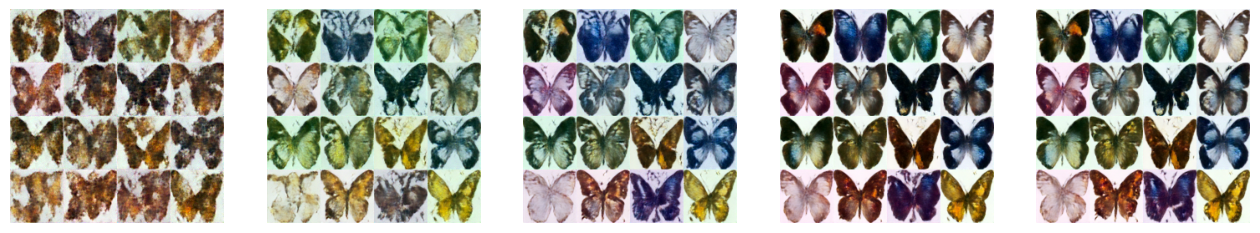

In [77]:
samples = [
    plt.imread(p)
    for p in sorted(list((Path() / "ddpm-butterflies-128" / "samples").glob("*")))
]
fig, axs = plt.subplots(1, 5, figsize=(16, 4))
for i, image in enumerate(samples):
    axs[i].imshow(image)
    axs[i].set_axis_off()
fig.show()